# CASA0013: Foundations of Spatial Data Science

## Analysis of the impact of Covid-19 on London’s short- and long-term rental markets: Project Overview

### Student ID: 22076982, 21191895, 22197341, 22078043
 

### Word Count: 

---

# Project Overview: <font color=blue>Analysis of the impact of Covid-19 on London’s rental markets</font> 

In this project, we'll assess how the Covid-19 pandemic has affected the Airbnb market in London. We'll aim to find out the impact on <b>Neighbourhoods</b>, <b>The quality of service of host</b>. The framework of this work as following:

1. <b>Data Preprocessing</b>: read data, clean data and transformate data in proper format for analysis;


2. <b>Exploratory Data Analysis</b>: explore the occupancy rate change during covid period;


3. <b>Data Analysis</b>: we set two different analysis perspectives. First, we focus on the neighbourhoods, we quantificate covid the impact on neighbourhood by specific attributes. Secondly, we analyze the quality of service of host based on listing score, comments.


To ensure the rigor of the study, we used the control variable approach. However, many influencing factors in the actual data are unavoidable, so there are the following <b>assumptions</b> in this project:

<font color = red>1. Covid is the only influence factor to targeted variable;


<font color = red>2. Short term rent means rent equal or less than 90 days, long term rent means rent greater than 90 days. We assume that during this period, once the lease form is confirmed, the options will not be changed until the lease expires. And the length of term is calculated by maximum nights minus minimum nights</font>

# Reproducible Analysis

## Data Preprocessing (Cleaning & Transformation)

### Read Data

#### Import Library

In [1]:
import numpy as np
import pandas as pd

# dispaly columns
pd.set_option('display.max_columns', None)

# visualization 
import matplotlib as mpl
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# color definition
%matplotlib inline
plt.style.use('fivethirtyeight')
mpl.rcParams['figure.figsize'] = (11, 4)
blue="#30a2da"
red = "#fc4f30"
yellow = "#e5ae38"
green = "#6d904f"
grey = "#8b8b8b"
five_thirty_eight = [blue, red, yellow, green, grey]
sns.set_palette(five_thirty_eight)

import os
from requests import get
from urllib.parse import urlparse

# map
import json
from bokeh.plotting import figure
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

from bokeh.palettes import brewer
from folium import Choropleth
import folium
import geopandas as gpd
from bokeh.io import output_file, show, output_notebook, push_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.plotting import figure

#### Read data

In [2]:
# Set download URL
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/data/listings.csv.gz'

# read data
df = pd.read_csv(url, compression='gzip', low_memory=False)

# print dataframe shape
print('Dataf frame shape:', df.shape)

Dataf frame shape: (69351, 75)


#### Describing the DataFrame

In [3]:
# dataset attributes
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

#### Save data on local 

In [5]:
import os
path = os.path.join('data','raw')
fn   = url.split('/')[-1]         

# If the path is not workable
if not os.path.exists(path):
    # make a new file
    os.makedirs(path)

df.to_csv(os.path.join(path,fn), index=False)

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
df_check = df[["availability_30","availability_60","availability_90",'availability_365']] # select multile columns

In [8]:
df_check.head(5)

availability_30  availability_60  availability_90  availability_365
0               17               38               68               343
1                2                2                2                70
2                1                1                1               222
3                2                2                2                74
4                8               23               37               249

#### Reloading the DataFrame

In [9]:
# only select interested attributes
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 
        'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications',
        'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type',
        'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365',
        'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
        'review_scores_location','review_scores_value', 'license', 
        'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']

In [10]:
# Reload the dataframe from local 
df = pd.read_csv(os.path.join(path,fn),low_memory=False)
df.shape

(69351, 75)

### Data Cleaning

#### Delete null values

In [11]:
pd.set_option('display.float_format', '{:.3f}'.format)

# Function for checking missing values precentage
def missing_statistics(df):
    '''
        Calculates missing value statistics for a given dataframe and 
        returns a dataframe containing number of missing values per column
        and the percentage of values missing per column.
        arguments:
            df: the dataframe for which missing values need to be calculated.
    '''
    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['num_missing']
    #print(missing_stats['num_missing'] / df.shape[0])
    missing_stats['pct_missing'] = np.round((missing_stats['num_missing'] / df.shape[0] *100),decimals=3)
    missing_stats.sort_values(by='num_missing', ascending=False, inplace=True)
    
    return missing_stats

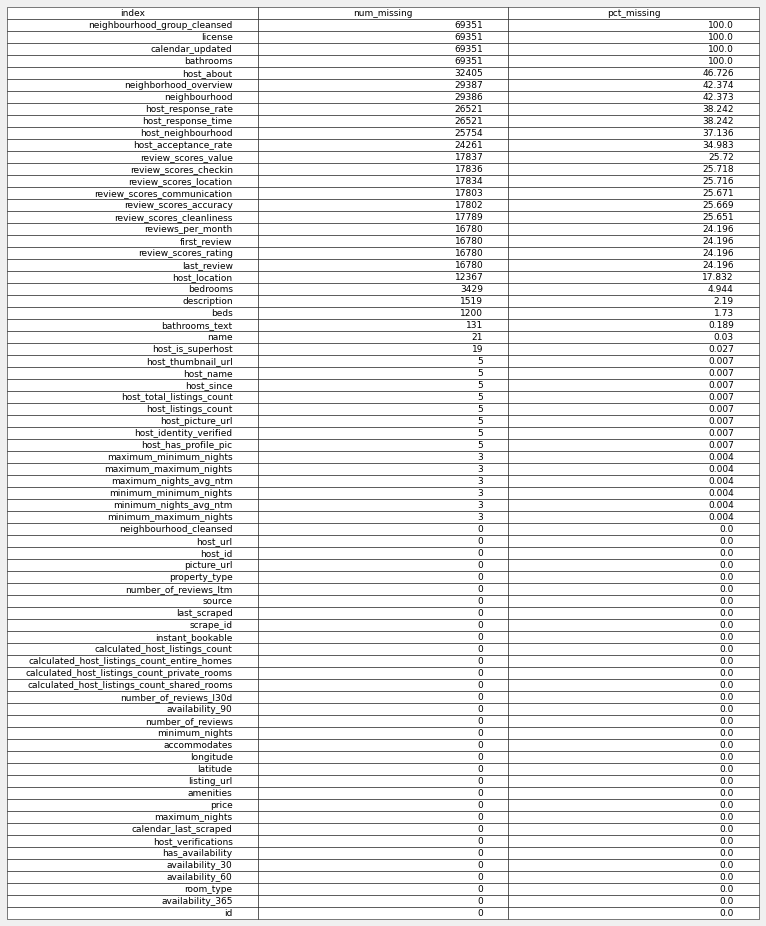

In [12]:
# print out the missing data and their missing percentage
missing_statistics = missing_statistics(df)
missing_statistics = missing_statistics.reset_index(level=0)

fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=missing_statistics.values,colLabels=missing_statistics.columns,loc='center')

#### Delete missing data (by columns)

In [13]:
# delete the total missing attributes
df.drop(columns=['license','bathrooms'], inplace=True)

#### Delete missing data (by rows)

In [14]:
# the missing data in each row
df.isnull().sum(axis=1).sort_values(ascending=False)

6365     28
4511     28
7415     28
5697     28
46088    26
         ..
18011     2
18002     2
49440     2
18000     2
0         2
Length: 69351, dtype: int64

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

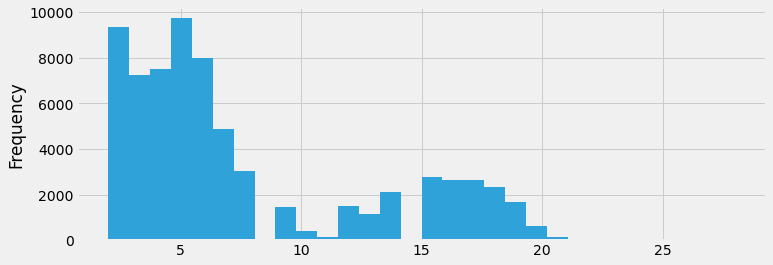

In [15]:
# visualize data missing count(by rows)
probs = df.isnull().sum(axis=1)
print(type(probs))      
probs.plot.hist(bins=30) 

In [16]:
# delete rows whose missing attributes more than 10
df.drop(probs[probs > 10].index, inplace=True)

In [17]:
print('Reduced dataframe shape: ', df.shape)

Reduced dataframe shape:  (51558, 73)


### Data Transformation

#### Attributes transformation

Make sure the data type is correct for further analysis process

In [18]:
# date tansformation
dates = ['last_scraped','host_since','first_review','last_review']

for d in dates:
    df[d] = pd.to_datetime(df[d], infer_datetime_format=True)
    
# category transformation
cats = ['property_type','room_type']
for c in cats:
    df[c] = df[c].astype('category')

# price transformation
money = ['price']
df.sample(5, random_state=42)[money]

for m in money:
    df[m] = df[m].str.replace('$','').str.replace(',','').astype('float')


# integer transformation
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365','calculated_host_listings_count']
for i in ints:
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("\tError Exception")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())
        
# check the transformation result
df.info()

<ipython-input-18-39514adc39eb>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[m] = df[m].str.replace('$','').str.replace(',','').astype('float')


	Error Exception
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51558 entries, 0 to 69350
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            51558 non-null  int32         
 1   listing_url                                   51558 non-null  object        
 2   scrape_id                                     51558 non-null  int64         
 3   last_scraped                                  51558 non-null  datetime64[ns]
 4   source                                        51558 non-null  object        
 5   name                                          51552 non-null  object        
 6   description                                   50810 non-null  object        
 7   neighborhood_overview                         33041 non-null  object        
 8   picture_url                                   515

---

#### Split the dataframe based on short/long term

In [19]:

df_short = df[df['maximum_nights'] - df['minimum_nights'] <= 90]
df_long = df[df['maximum_nights'] - df['minimum_nights'] > 90]

In [20]:
print("number of short term listings: ", df_short.shape[0])
print("number of long term listings ", df_long.shape[0])

number of short term listings:  17139
number of long term listings  34419


#### Split the dataframe based on time

Covid time split based on the news:

1. 23 March, 2020: PM announces the first lockdown in the UK, ordering people to 'stay at home';


2. 23 June, 2020: PM says UK's 'national hiberanation' coming to an end - announces relaxing of restrictions and 2m social distancing rule;


3. 5 Nobember, 2020: Second national locakdown comes into force in England;


4. 2 December, 2020: Second lockdown ends after four weeks and England returns to a stricter three-tier system of restrictions;


5. 6 January, 2021: England enters third national lockdown;


6. 19 July, 2021: Most legal limits on social contact removed in England , and the final closed sectors of the economy reopened(.e.g. nightclubs)


Therefore, we divided the time from 2019/01/01(the year when covid begin) - 2020/09/10(updated inside Airbnb time) into three different periods:

1. <b>Before covid</b>: 2019/01/01 - 2020/03/23


2. <b>During covid</b>: 2020/03/24 - 2021/07/19


3. <b>After covid</b>: 2021/07/20 - 2022/09/10

In [21]:
split_date1 = '2019-01-01'
split_date2 = '2020-03-23'
split_date3 = '2021-07-19'
split_date4 = '2022-09-10'

# before covid
df_after_2019 = df.loc[df['last_review'] >= split_date1]
df_before_covi = df_after_2019.loc[df_after_2019['last_review'] <= split_date2]

# during covid
df_during_covi = df_after_2019.loc[df_after_2019['last_review'] <= split_date3]
df_during_covi = df_during_covi.loc[df_during_covi['last_review'] > split_date2]

# after covid
df_after_covi = df_after_2019.loc[df_after_2019['last_review'] > split_date3]

In [22]:
# check the time period if u want

# df_before_covi['last_review'].sort_values()

# df_during_covi['last_review'].sort_values()

# df_after_covi['last_review'].sort_values()

#### Split the dataframe based on short/long term

When listing support rent more than 90 days: Long term;

Otherwise: short term.

In [23]:
# short term
short_before_covi = df_before_covi[df_before_covi['maximum_nights'] - df_before_covi['minimum_nights'] <= 90]
short_during_covi = df_during_covi[df_during_covi['maximum_nights'] - df_during_covi['minimum_nights'] <= 90]
short_after_covi = df_after_covi[df_after_covi['maximum_nights'] - df_after_covi['minimum_nights'] <= 90]

# long term
long_before_covi = df_before_covi[df_before_covi['maximum_nights'] - df_before_covi['minimum_nights'] > 90]
long_during_covi = df_during_covi[df_during_covi['maximum_nights'] - df_during_covi['minimum_nights'] > 90]
long_after_covi = df_after_covi[df_after_covi['maximum_nights'] - df_after_covi['minimum_nights'] > 90]

#### Save the data to local

In [24]:
path = os.path.join('data','clean')

if not os.path.exists(path):
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)

## Exploratory Data Analysis

- In the data exploration analysis process of this project, we focused on analyzing the change of room during covid. This may be very helpful for the later research part.



- The listings' occupancy rate cannot be directly determined by any variable. As a proxy variable, we will make use of the reviews_per_month column. It makes sense to assume that the occupancy rate and review rate are roughly inversely proportional.

#### Occupancy rate

In [25]:
# url 
data_url = 'http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/data/reviews.csv.gz'

reviews = pd.read_csv(data_url,compression='gzip' ,low_memory=False)

print('Dataframe shape:', reviews.shape)

Dataframe shape: (1216212, 6)


In [26]:
reviews.head(5)

listing_id                  id        date  reviewer_id  \
0            52228441  623723762668719111  2022-05-10     37052865   
1            52228441  505671819125096360  2021-11-28     70830110   
2            52228441  466510411892882382  2021-10-05     83617224   
3            52228441  604109461995958546  2022-04-13      2152541   
4  605617198416835367  633128504578904919  2022-05-23     45418187   

  reviewer_name                                           comments  
0      Kimberly  Great location, and the host was very responsi...  
1       Mahelet  Duccio is a lovely and friendly host. From arr...  
2          Will  Duccio is a good communicator… he was very hel...  
3     Francesco  Not entirely compliant to the pics.<br/>Good l...  
4        Waddah                         Great place and great host

In [27]:
# total review by year and month
reviews['date_adj'] = pd.to_datetime(reviews['date'])
reviews['date'] = pd.to_datetime(reviews['date'])
reviews = reviews.set_index('date_adj')

year_reviews_num = reviews.resample('Y').size()
month_reviews_num = reviews.resample('M').size()
mean_year = month_reviews_num.resample('Y').mean()
mean_year = mean_year.shift(6, freq='M') #centre it in the middle of each year

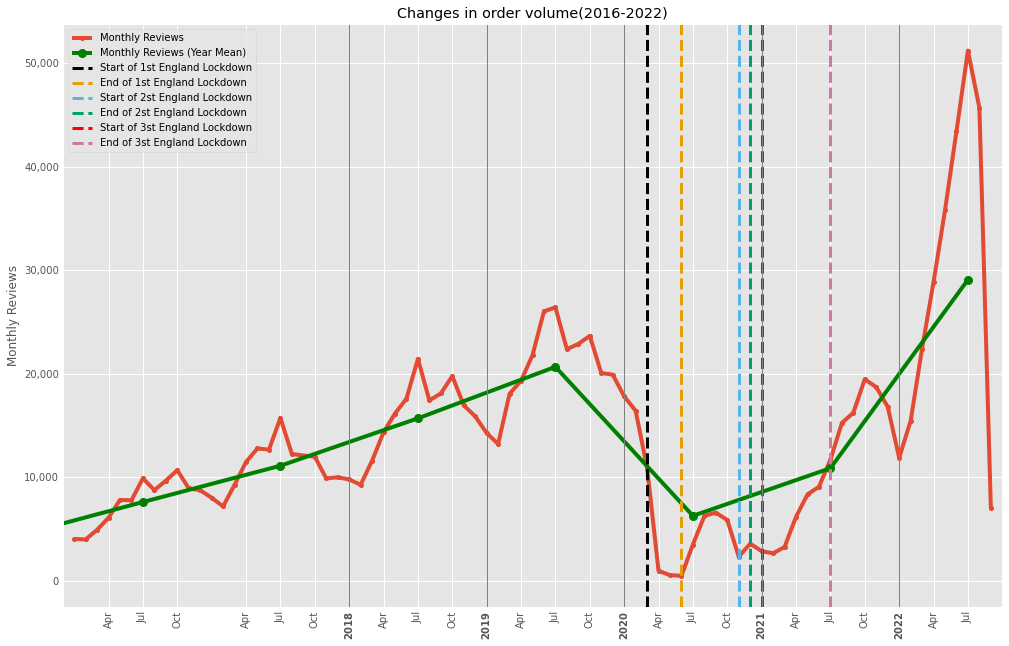

In [28]:
plt.style.use('ggplot')

# x-axis date 
dates = pd.date_range(start='01-Jan-2016', end='11-Sep-2022', freq='3M')
dates = dates[dates.month!=1]
years = pd.to_datetime(list(range(2018,2023)), format='%Y')
years.strftime('%Y')

# total reviews per month
fig, ax = plt.subplots()
month_reviews_num = month_reviews_num[month_reviews_num.index.year>=2016].copy()
month_reviews_num.plot(figsize=(15,10), marker='o', markersize=4, ax=ax, label='Monthly Reviews')
mean_year.plot(ax=ax, color='green', marker='o', markersize=8, label='Monthly Reviews (Year Mean)')

### Drawing Covid Timeline

# PM announce the first lockdown in the UK, ordering people to 'stay at home'
ax.axvline('23-March-2020', color='#000000', linestyle='--', label = 'Start of 1st England Lockdown', linewidth=3)

# PM says UK's 'national hiberanation' coming to an end - announces relaxing of restrictions and 2m social distancing rule
ax.axvline('23-June-2020', color='#E69F00', linestyle='--', label = 'End of 1st England Lockdown', linewidth=3)

# Second national locakdown comes into force in England
ax.axvline('5-November-2020', color='#56B4E9', linestyle='--', label = 'Start of 2st England Lockdown', linewidth=3)
# Second lockdown ends after four weeks and England returns to a stricter three-tier system of restrictions
ax.axvline('2-December-2020', color='#009E73', linestyle='--', label = 'End of 2st England Lockdown', linewidth=3)

# England enters third national lockdown
ax.axvline('6-January-2021', color='red', linestyle='--', label = 'Start of 3st England Lockdown', linewidth=3)

# Most legal limits on social contact removed in England , and the final closed sectors of the economy reopened
ax.axvline('19-July-2021', color='#CC79A7', linestyle='--', label = 'End of 3st England Lockdown', linewidth=3)


### Covid Timeline

# set x-axis limitation...
ax.set_xlim('Dec-2015','Oct-2022')
ax.set_xticks(years, minor=False)
ax.set_xticklabels(years.strftime('%Y'), rotation=90, minor=False, fontweight='bold')
ax.set_xticks(dates, minor=True)
ax.set_xticklabels(dates.strftime('%b'), rotation=90, minor=True)
ax.grid(which='minor')

for year in years:
    ax.axvline(year, linewidth=1, color='grey')

ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))    

ax.set_xlabel('')
ax.set_ylabel('Monthly Reviews')
ax.set_title('Changes in order volume(2016-2022)')
plt.legend();

----

## Data Analysis

### Neighbourhoods Analysis

- Researching the impact of the new crown on the airbnb market according to neighborhood

<b>Combine the 3 sections of data</b>

Research-worthy properties：

- 'neighbourhood' 

- 'neighbourhood_cleansed'

- 'price' 

- 'room_type' ： 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'

- 'review_scores_rating'

- 'review_scores_accuracy'

- 'review_scores_cleanliness'

- 'review_scores_checkin'

- 'review_scores_communication'

- 'review_scores_location'

- 'availability_30'

- 'availability_60'

- 'availability_90'

DataFrame:

- df_before_covi

- df_during_covi

- df_after_covi

In [29]:
### Short term
# split dataframe based on the period 
short_attr_before = short_before_covi[['id','reviews_per_month', 'price','room_type', 'neighbourhood','neighbourhood_cleansed', 'room_type','review_scores_rating','review_scores_accuracy','review_scores_location','availability_30', 'availability_60','availability_90' ]].copy()

short_attr_before['period']= 'before'


short_attr_during = short_during_covi[['id','reviews_per_month', 'price','room_type', 'neighbourhood','neighbourhood_cleansed', 'room_type','review_scores_rating','review_scores_accuracy','review_scores_location' ,'availability_30', 'availability_60','availability_90']].copy()

short_attr_during['period']= 'during'


short_attr_after = short_after_covi[['id','reviews_per_month', 'price','room_type', 'neighbourhood','neighbourhood_cleansed', 'room_type','review_scores_rating','review_scores_accuracy','review_scores_location' ,'availability_30', 'availability_60','availability_90']].copy()

short_attr_after['period']= 'after'

# Merge dataframe
short_combined = pd.concat([short_attr_before, short_attr_during,short_attr_after], ignore_index=True)

In [30]:
### Long term
# split dataframe based on the period 
long_attr_before = long_before_covi[['id','reviews_per_month', 'price','room_type', 'neighbourhood','neighbourhood_cleansed', 'room_type','review_scores_rating','review_scores_accuracy','review_scores_location','availability_30', 'availability_60','availability_90' ]].copy()

long_attr_before['period']= 'before'


long_attr_during = long_during_covi[['id','reviews_per_month', 'price','room_type', 'neighbourhood','neighbourhood_cleansed', 'room_type','review_scores_rating','review_scores_accuracy','review_scores_location' ,'availability_30', 'availability_60','availability_90']].copy()

long_attr_during['period']= 'during'


long_attr_after = long_after_covi[['id','reviews_per_month', 'price','room_type', 'neighbourhood','neighbourhood_cleansed', 'room_type','review_scores_rating','review_scores_accuracy','review_scores_location' ,'availability_30', 'availability_60','availability_90']].copy()

long_attr_after['period']= 'after'

# Merge dataframe
long_combined = pd.concat([long_attr_before, long_attr_during,long_attr_after], ignore_index=True)

<b> Visualization(Number of listings) </b>

Short Term

In [31]:
def auto_text(rects):
    for rect in rects:
        plt.text(rect.get_x()+0.33, rect.get_height(), rect.get_height(), ha='left', va='bottom')


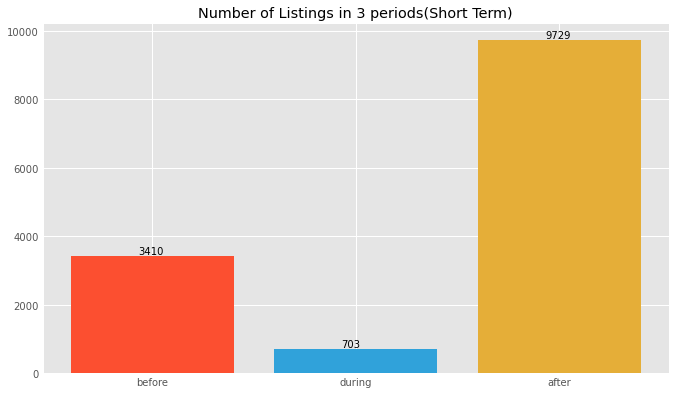

In [32]:
# number of listings
num_sbefore = len(short_attr_before)
num_sduring = len(short_attr_during)
num_safter = len(short_attr_after)

# plot the bar chart 
plt.subplots(figsize=(10,6))
data_s = [num_sbefore, num_sduring, num_safter]

rect1 = plt.bar(range(len(data_s)), data_s, color=[ red,blue, yellow])
x = ['before', 'during', 'after']

auto_text(rect1)

plt.xticks(range(3), x)
plt.title('Number of Listings in 3 periods(Short Term)')

#fig.tight_layout()

plt.show()

Long Term

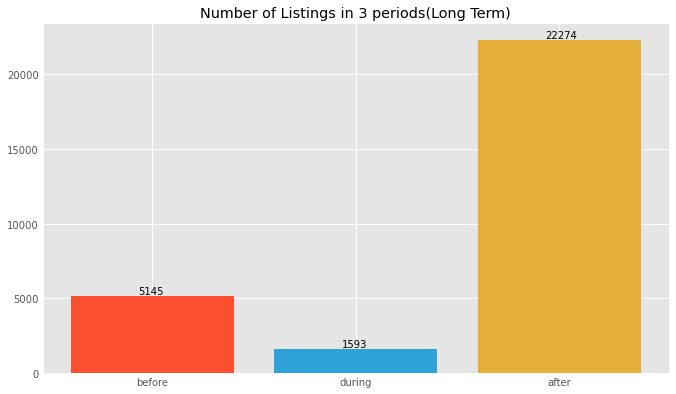

In [33]:
# number of listings
num_lbefore = len(long_attr_before)
num_lduring = len(long_attr_during)
num_lafter = len(long_attr_after)

# plot the bar chart 
plt.subplots(figsize=(10,6))
data_l = [num_lbefore, num_lduring, num_lafter]

rect1 = plt.bar(range(len(data_l)), data_l, color=[ red,blue, yellow])
x = ['before', 'during', 'after']

auto_text(rect1)
plt.xticks(range(3), x)
plt.title('Number of Listings in 3 periods(Long Term)')

#fig.tight_layout()

plt.show()

---

<b>Compare the difference in the number of properties in different neghbourhoods</b>

Considering different neighbourhoods, we analysis and visualize:

1. Number of Listings per Neighbourhood for the three periods

2. Change in average score per Neighbourhood

<b>Number of Listings per Neighbourhood for the three periods</b>

In [34]:
# short term
short_combined = short_combined.dropna()
neigh_names_s = short_combined[ 'neighbourhood'].to_frame()
neigh_names_list_s = list(neigh_names_s['neighbourhood'])
for i, v in enumerate(neigh_names_list_s): neigh_names_list_s[i] = v.split(',')[:1][0]

In [35]:
# short term
short_combined['neighbourhood'] = neigh_names_list_s

In [36]:
# No specific Neighbourhood name
combined_dropLondon= short_combined[~short_combined['neighbourhood'].isin(['London','Greater London','London '])]

- 'before' -- red,

- 'during' -- blue,

- 'after' -- yellow

- Neighbourhoods are listed in descending order by the number of properties in the after period

Short Term

- Number of Listings per Neighbourhood for the 3 periods in Long Term

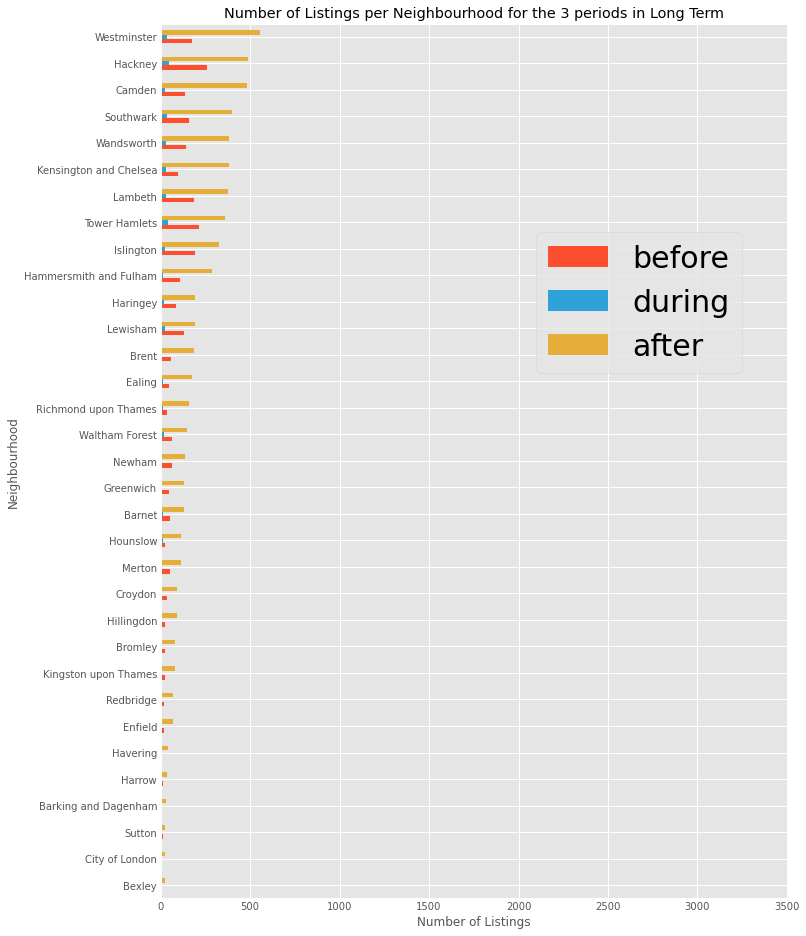

In [93]:
#Calculate the number of listings per neighbourhood
listings_nbd_year = pd.crosstab(index=short_combined['period'], columns=short_combined['neighbourhood_cleansed'])
per_change = listings_nbd_year.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0], axis=1)
order = short_combined.loc[short_combined.period=='after', 'neighbourhood_cleansed'].value_counts().sort_values(ascending=True).index
listings_nbd_year = listings_nbd_year.loc[order]
per_change = per_change.loc[order]

#Plot Change in Number of Listings per Neighbourhood
fig, ax = plt.subplots(figsize=(10,15))



listings_nbd_year[['before','during','after']].plot.barh(ax=ax, color=[red,blue,yellow])
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighbourhood')
ax.set_xlim(0,3500)
ax.set_title('Number of Listings per Neighbourhood for the 3 periods in Long Term')

    
ax.legend(loc=(0.6,0.6),prop = {'size':30})
    
plt.show()

In [101]:
listings_nbd_year = pd.crosstab(index=short_combined['period'], columns=short_combined['neighbourhood_cleansed'])

In [105]:
listings_nbd_year
#len(listings_nbd_year.columns)# 33


neighbourhood_cleansed  Barking and Dagenham  Barnet  Bexley  Brent  Bromley  \
period                                                                         
after                                     30     129      23    188       82   
before                                    10      51      10     57       25   
during                                     2      13       1      9        6   

neighbourhood_cleansed  Camden  City of London  Croydon  Ealing  Enfield  \
period                                                                     
after                      481              24       91     175       70   
before                     138               7       36      46       20   
during                      25               1        4      14        1   

neighbourhood_cleansed  Greenwich  Hackney  Hammersmith and Fulham  Haringey  \
period                                                                         
after                         130      487                     286       194   
before                         45      257                     111        85   
during                          8       49                      13        19   

neighbourhood_cleansed  Harrow  Havering  Hillingdon  Hounslow  Islington  \
period                                                                      
after                       35        40          89       116        329   
before                      14         9          22        25        191   
during                       3         2           8        11         26   

neighbourhood_cleansed  Kensington and Chelsea  Kingston upon Thames  Lambeth  \
period                                                                          
after                                      381                    80      378   
before                                     100                    24      184   
during                                      28                     1       31   

neighbourhood_cleansed  Lewisham  Merton  Newham  Redbridge  \
period                                                        
after                        193     113     138         71   
before                       129      52      66         20   
during                        22       5       9          4   

neighbourhood_cleansed  Richmond upon Thames  Southwark  Sutton  \
period                                                            
after                                    160        401      27   
before                                    36        160      11   
during                                    11         37       4   

neighbourhood_cleansed  Tower Hamlets  Waltham Forest  Wandsworth  Westminster  
period                                                                          
after                             362             148         384          554  
before                            217              64         143          174  
during                             44              21          32           36

In [143]:
list_nei = listings_nbd_year.columns
list_nei[1]

'Barnet'

In [145]:
listings_nbd_year[list_nei]['Barnet']

period
after     129
before     51
during     13
Name: Barnet, dtype: int64

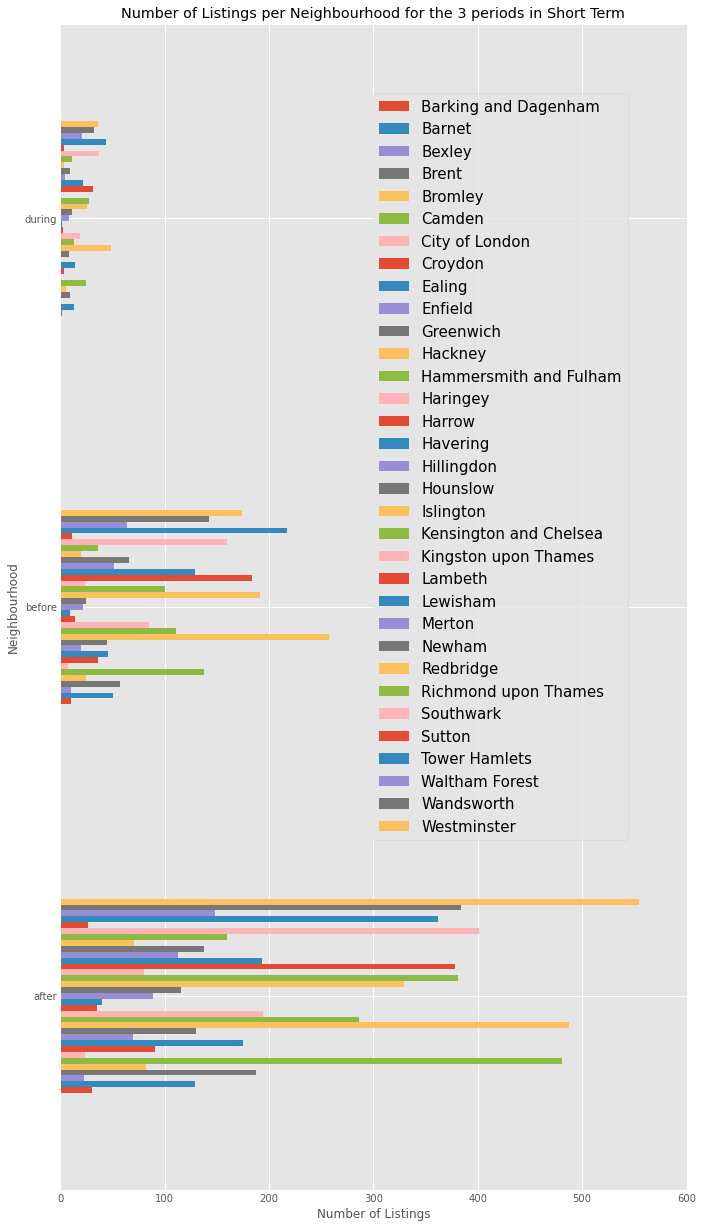

In [167]:
#Calculate the number of listings per neighbourhood
listings_nbd_year = pd.crosstab(index=short_combined['period'], columns=short_combined['neighbourhood_cleansed'])


#Plot Change in Number of Listings per Neighbourhood
fig, ax = plt.subplots(figsize=(10,20))



listings_nbd_year[list_nei].plot.barh(ax = ax)

ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighbourhood')
ax.set_xlim(0,600)
ax.set_title('Number of Listings per Neighbourhood for the 3 periods in Short Term')

    
ax.legend(loc=(0.5,0.3),prop = {'size':15})
    
plt.show()

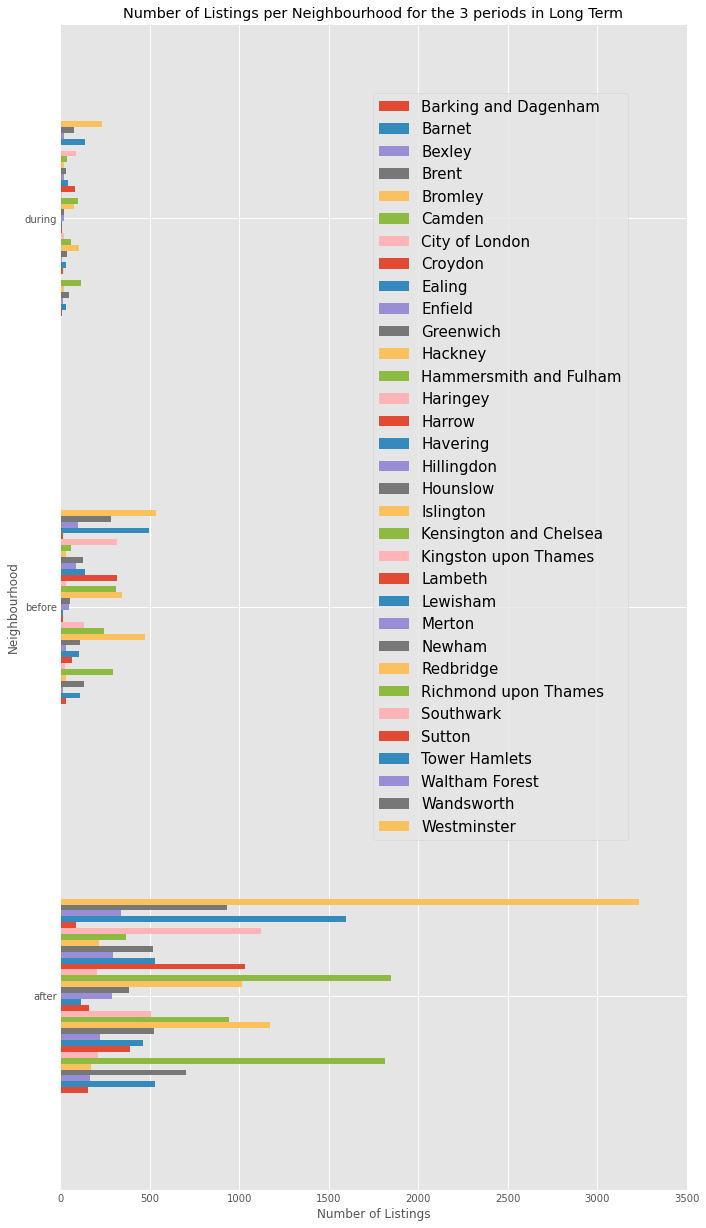

In [165]:
#Calculate the number of listings per neighbourhood
listings_nbd_year = pd.crosstab(index=long_combined['period'], columns=long_combined['neighbourhood_cleansed'])


#Plot Change in Number of Listings per Neighbourhood
fig, ax = plt.subplots(figsize=(10,20))



listings_nbd_year[list_nei].plot.barh(ax = ax)

ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighbourhood')
ax.set_xlim(0,3500)
ax.set_title('Number of Listings per Neighbourhood for the 3 periods in Long Term')

    
ax.legend(loc=(0.5,0.3),prop = {'size':15})
    
plt.show()

In [ ]:
# number of listings
num_lbefore = len(long_attr_before)
num_lduring = len(long_attr_during)
num_lafter = len(long_attr_after)

# plot the bar chart 
plt.subplots(figsize=(10,6))
data_l = [num_lbefore, num_lduring, num_lafter]

rect1 = plt.bar(range(len(data_l)), data_l, color=[ red,blue, yellow])
x = ['before', 'during', 'after']

auto_text(rect1)
plt.xticks(range(3), x)
plt.title('Number of Listings in 3 periods(Long Term)')

#fig.tight_layout()

plt.show()

In [100]:
short_combined.groupby('period').agg('mean')

id  reviews_per_month   price        room_type   neighbourhood  \
0         15400              0.570  75.000  Entire home/apt          London   
1        137581              1.570 130.000  Entire home/apt  Greater London   
2         39387              0.100  42.000     Private room          London   
3        299374              1.370  59.000  Entire home/apt         Wembley   
4         41509              0.520 150.000     Private room        Hounslow   
...         ...                ...     ...              ...             ...   
13835  15840243              0.810 814.000  Entire home/apt  Greater London   
13836   1158531              0.160  83.000  Entire home/apt       Northwood   
13839   9568415              0.420 104.000  Entire home/apt  Greater London   
13840   9671724              0.840  55.000     Private room          London   
13841  20277958              0.990 201.000  Entire home/apt  Greater London   

       neighbourhood_cleansed        room_type  review_scores_rating  \
0      Kensington and Chelsea  Entire home/apt                 4.790   
1              City of London  Entire home/apt                 4.890   
2                 Westminster     Private room                 4.500   
3                       Brent  Entire home/apt                 4.660   
4                    Hounslow     Private room                 4.500   
...                       ...              ...                   ...   
13835               Southwark  Entire home/apt                 5.000   
13836              Hillingdon  Entire home/apt                 4.610   
13839               Greenwich  Entire home/apt                 4.160   
13840               Greenwich     Private room                 4.900   
13841               Southwark  Entire home/apt                 4.900   

       review_scores_accuracy  review_scores_location  availability_30  \
0                       4.840                   4.930                2   
1                       4.960                   4.920                0   
2                       4.600                   4.500                0   
3                       4.740                   4.530                0   
4                       4.450                   4.840                0   
...                       ...                     ...              ...   
13835                   4.980                   4.960               11   
13836                   4.830                   4.890                0   
13839                   4.440                   4.660               29   
13840                   4.970                   4.860                0   
13841                   4.920                   5.000                0   

       availability_60  availability_90  period  
0                    2                2  before  
1                    0                0  before  
2                    0                0  before  
3                    3                3  before  
4                    7               37  before  
...                ...              ...     ...  
13835               16               25   after  
13836                0                0   after  
13839               59               89   after  
13840                0                0   after  
13841                0                0   after  

[9428 rows x 14 columns]

- Top 10 Number of Listings per Neighbourhood for the 3 periods in Short Term

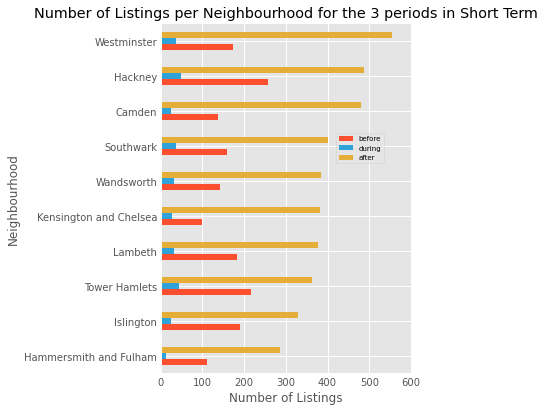

In [83]:
#Calculate the number of listings per neighbourhood
listings_nbd_year = pd.crosstab(index=short_combined['neighbourhood_cleansed'], columns=short_combined['period'])
per_change = listings_nbd_year.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0], axis=1)
order = short_combined.loc[short_combined.period=='after', 'neighbourhood_cleansed'].value_counts().sort_values(ascending=True).index
listings_nbd_year = listings_nbd_year.loc[order]
per_change = per_change.loc[order]

#Plot Change in Number of Listings per Neighbourhood
fig, ax = plt.subplots(figsize=(4,6))



listings_nbd_year[['before','during','after']].tail(10).plot.barh(ax=ax, color=[red,blue,yellow])
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighbourhood')
ax.set_xlim(0,600)
ax.set_title('Top 10 Number of Listings per Neighbourhood for the 3 periods in Short Term')

    
ax.legend(loc=(0.7,0.6),prop = {'size':7})
    
plt.show()

Long Term

- Number of Listings per Neighbourhood for the 3 periods in Long Term

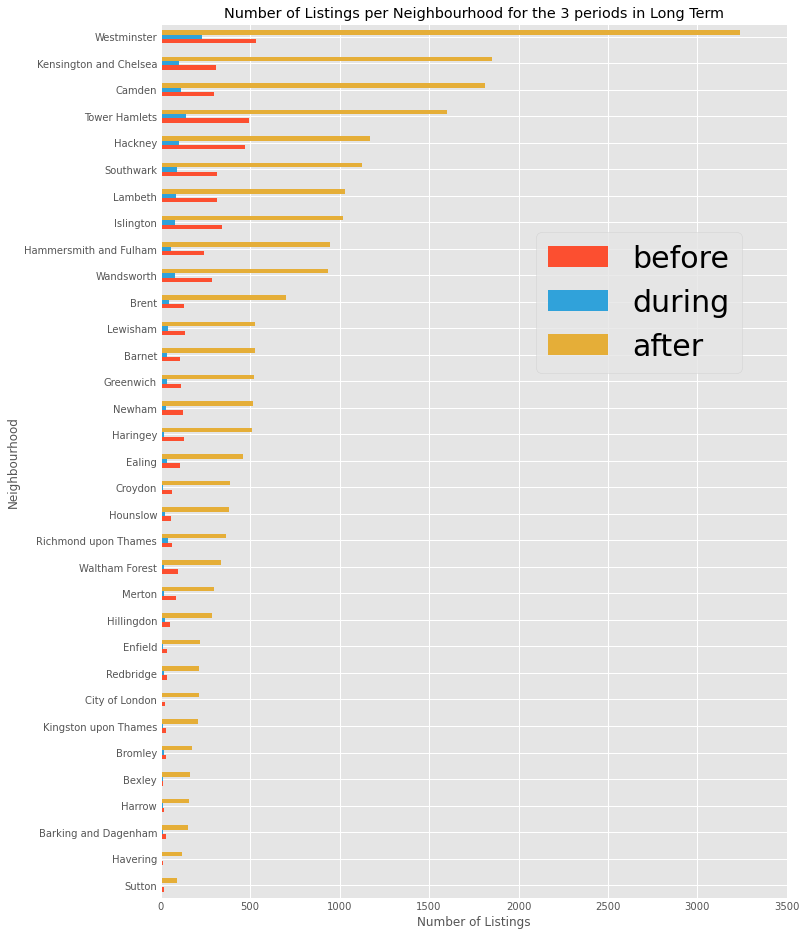

In [92]:
#Calculate the number of listings per neighbourhood
listings_nbd_year = pd.crosstab(index=long_combined['neighbourhood_cleansed'], columns=long_combined['period'])
per_change = listings_nbd_year.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0], axis=1)
order = long_combined.loc[long_combined.period=='after', 'neighbourhood_cleansed'].value_counts().sort_values(ascending=True).index
listings_nbd_year = listings_nbd_year.loc[order]
per_change = per_change.loc[order]

#Plot Change in Number of Listings per Neighbourhood
fig, ax = plt.subplots(figsize=(10,15))



listings_nbd_year[['before','during','after']].plot.barh(ax=ax, color=[red,blue,yellow])
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighbourhood')
ax.set_xlim(0,3500)
ax.set_title('Number of Listings per Neighbourhood for the 3 periods in Long Term')

    
ax.legend(loc=(0.6,0.6),prop = {'size':30})
    
plt.show()

In [97]:
listings_nbd_year

period                  after  before  during
Sutton                     90      17       6
Havering                  119      16       9
Barking and Dagenham      153      30      11
Harrow                    161      18      11
Bexley                    167      16      15
Bromley                   173      30      19
Kingston upon Thames      208      33      11
City of London            214      26       7
Redbridge                 215      34      21
Enfield                   223      34      11
Hillingdon                288      50      24
Merton                    297      87      21
Waltham Forest            338      99      21
Richmond upon Thames      366      63      39
Hounslow                  382      56      24
Croydon                   388      64      14
Ealing                    462     106      34
Haringey                  510     132      20
Newham                    519     128      31
Greenwich                 523     113      36
Barnet                    528     111      34
Lewisham                  530     136      42
Brent                     701     133      49
Wandsworth                934     285      78
Hammersmith and Fulham    945     244      59
Islington                1018     346      78
Lambeth                  1030     316      85
Southwark                1123     315      90
Hackney                  1170     472     103
Tower Hamlets            1599     495     141
Camden                   1815     296     115
Kensington and Chelsea   1850     311     101
Westminster              3235     533     233

- Top 10 Number of Listings per Neighbourhood for the 3 periods in Long Term

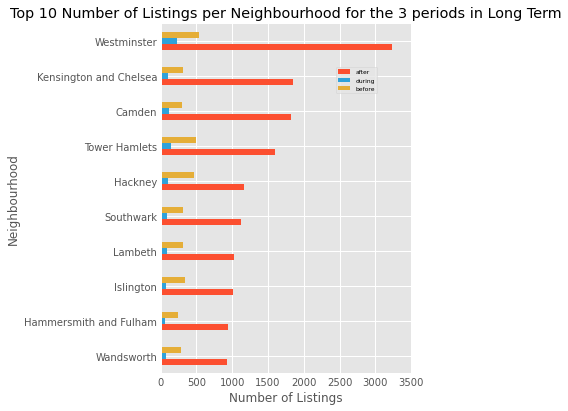

In [96]:
#Calculate the number of listings per neighbourhood
listings_nbd_year = pd.crosstab(index=long_combined['neighbourhood_cleansed'], columns=long_combined['period'])
per_change = listings_nbd_year.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0], axis=1)
order = long_combined.loc[long_combined.period=='after', 'neighbourhood_cleansed'].value_counts().sort_values(ascending=True).index
listings_nbd_year = listings_nbd_year.loc[order]
per_change = per_change.loc[order]

#Plot Change in Number of Listings per Neighbourhood
fig, ax = plt.subplots(figsize=(4,6))



listings_nbd_year[['after','during','before']].tail(10).plot.barh(ax=ax, color=[red,blue,yellow])
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighbourhood')
ax.set_xlim(0,3500)
ax.set_title('Top 10 Number of Listings per Neighbourhood for the 3 periods in Long Term')

    
ax.legend(loc=(0.7,0.8),prop = {'size':6})
    
plt.show()

<b>Change in average score per Neighbourhood</b>

- Highest to lowest average review_scores_rating neighbourhoods in the before, during and after periods.

In [39]:
df_groupby_nei_before_avg = short_attr_before.groupby('neighbourhood_cleansed').agg('mean') #  min 4.5
df_groupby_nei_during_avg = short_attr_during.groupby('neighbourhood_cleansed').agg('mean') # min 4.35
df_groupby_nei_after_avg = short_attr_after.groupby('neighbourhood_cleansed').agg('mean') # min 4.5
#df_groupby_nei_after_avg[['review_scores_rating']].sort_values(by=['review_scores_rating'],ascending=False)

In [40]:
df_groupby_nei_before_avg_long = long_attr_before.groupby('neighbourhood_cleansed').agg('mean')
df_groupby_nei_during_avg_long = long_attr_during.groupby('neighbourhood_cleansed').agg('mean') 
df_groupby_nei_after_avg_long = long_attr_after.groupby('neighbourhood_cleansed').agg('mean') 

- count of neighbourhoods in review scores rating segment

Short Term

In [41]:
def auto_text(rects):
    for rect in rects:
        plt.text(rect.get_x()+0.05, rect.get_height(), rect.get_height(), ha='left', va='bottom')

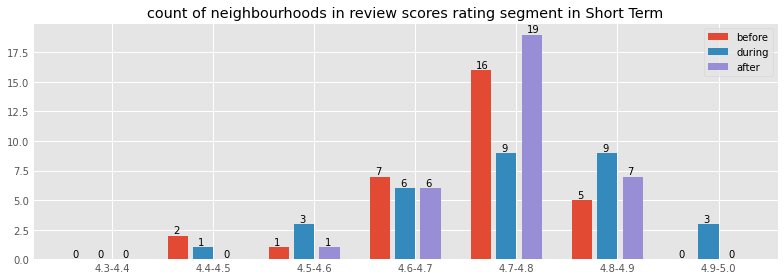

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


score_before = df_groupby_nei_before_avg['review_scores_rating'].values.tolist()
score_during = df_groupby_nei_during_avg['review_scores_rating'].values.tolist()
score_after = df_groupby_nei_after_avg['review_scores_rating'].values.tolist()

bins=[4.3,4.4,4.5,4.6,4.7,4.8,4.9,5]

segments=pd.cut(score_before,bins,right=False)
segments2=pd.cut(score_during,bins,right=False)
segments3=pd.cut(score_after,bins,right=False)

counts=pd.value_counts(segments,sort=False)
counts2=pd.value_counts(segments2,sort=False)
counts3=pd.value_counts(segments3,sort=False)

x = np.arange(7)  
width = 0.2  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2+0.05,counts, width,label='before' )
rects2 = ax.bar(x - width+0.1, counts2, width,label='during')
rects3 = ax.bar(x + 0.15, counts3, width,label='after')
ax.legend()

x = ['4.3-4.4','4.4-4.5','4.5-4.6', '4.6-4.7','4.7-4.8','4.8-4.9','4.9-5.0']

auto_text(rects1)
auto_text(rects2)
auto_text(rects3)

plt.xticks(range(7), x)
#plt.bar(counts.index.astype(str),counts)
plt.title('count of neighbourhoods in review scores rating segment in Short Term')

fig.tight_layout()

plt.show()

Long Term

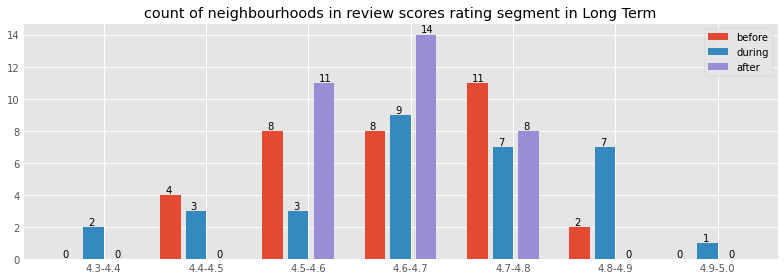

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


score_before = df_groupby_nei_before_avg_long['review_scores_rating'].values.tolist()
score_during = df_groupby_nei_during_avg_long['review_scores_rating'].values.tolist()
score_after = df_groupby_nei_after_avg_long['review_scores_rating'].values.tolist()

bins=[4.3,4.4,4.5,4.6,4.7,4.8,4.9,5]

segments=pd.cut(score_before,bins,right=False)
segments2=pd.cut(score_during,bins,right=False)
segments3=pd.cut(score_after,bins,right=False)

counts=pd.value_counts(segments,sort=False)
counts2=pd.value_counts(segments2,sort=False)
counts3=pd.value_counts(segments3,sort=False)

x = np.arange(7)  
width = 0.2  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2+0.05,counts, width,label='before' )
rects2 = ax.bar(x - width+0.1, counts2, width,label='during')
rects3 = ax.bar(x + 0.15, counts3, width,label='after')
ax.legend()

x = ['4.3-4.4','4.4-4.5','4.5-4.6', '4.6-4.7','4.7-4.8','4.8-4.9','4.9-5.0']

auto_text(rects1)
auto_text(rects2)
auto_text(rects3)

plt.xticks(range(7), x)
#plt.bar(counts.index.astype(str),counts)
plt.title('count of neighbourhoods in review scores rating segment in Long Term')

fig.tight_layout()

plt.show()

### Host service quality analysis

The analysis of host service quality focus on two different aspects:
1. Determing service quality based on the listing scores

2. Determing service quality based on the user's comment

#### Determine service quality based on listing score

In [44]:
# scores related attributes
scores = ['neighbourhood_cleansed','review_scores_accuracy','review_scores_rating','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
         'review_scores_location','review_scores_value','id','latitude','longitude']

# filter attributes related to the listing score

# short + long term
df_before_score = df_before_covi[scores]
df_during_score = df_during_covi[scores]
df_after_score = df_after_covi[scores]


# short term
dfs_before_score = short_before_covi[scores]
dfs_during_score = short_during_covi[scores]
dfs_after_score = short_after_covi[scores]

# long term
dfl_before_score = long_before_covi[scores]
dfl_during_score = long_during_covi[scores]
dfl_after_score = long_after_covi[scores]

---

##### Host service quality analysis (based on listing socre)

This part we calculating listing score in three different covid periods. Meanwhile, we did some research on the generation of Airbnb score generation process. Therefore, one more weighted score is added to the comparation. 

The weight setting is based on the pervious study result:
https://bnbfacts.com/how-airbnb-category-ratings-affect-overall-rating/

Score preprocessing

<b>Short term</b>

In [45]:
### score weight setting
# before covid
x1 = short_before_covi.review_scores_accuracy.mean()*0.3097+short_before_covi.review_scores_cleanliness.mean()*0.231+short_before_covi.review_scores_communication.mean()*0.1825+short_before_covi.review_scores_location.mean()*0.1428+short_before_covi.review_scores_checkin.mean()*0.1339
# during covid
x2 = short_during_covi.review_scores_accuracy.mean()*0.3097+short_during_covi.review_scores_cleanliness.mean()*0.231+short_during_covi.review_scores_communication.mean()*0.1825+short_during_covi.review_scores_location.mean()*0.1428+short_during_covi.review_scores_checkin.mean()*0.1339
# after covid
x3 = short_after_covi.review_scores_accuracy.mean()*0.3097+short_after_covi.review_scores_cleanliness.mean()*0.231+short_after_covi.review_scores_communication.mean()*0.1825+short_after_covi.review_scores_location.mean()*0.1428+short_after_covi.review_scores_checkin.mean()*0.1339

### Convert the 
# before covid
be_co_val = float('%.2f' % short_before_covi['review_scores_value'].mean())
be_co_wval = float('%.2f' % x1)
be_co_acc = float('%.2f' % short_before_covi['review_scores_accuracy'].mean())
be_co_rat = float('%.2f' % short_before_covi['review_scores_rating'].mean())
be_co_cle = float('%.2f' % short_before_covi['review_scores_cleanliness'].mean())
be_co_chin = float('%.2f' % short_before_covi['review_scores_checkin'].mean())
be_co_com = float('%.2f' % short_before_covi['review_scores_communication'].mean())
be_co_loc = float('%.2f' % short_before_covi['review_scores_location'].mean())

# during covid
du_co_val = float('%.2f' % short_during_covi['review_scores_value'].mean())
du_co_wval = float('%.2f' % x2)
du_co_acc = float('%.2f' % short_during_covi['review_scores_accuracy'].mean())
du_co_rat = float('%.2f' % short_during_covi['review_scores_rating'].mean())
du_co_cle = float('%.2f' % short_during_covi['review_scores_cleanliness'].mean())
du_co_chin = float('%.2f' % short_during_covi['review_scores_checkin'].mean())
du_co_com = float('%.2f' % short_during_covi['review_scores_communication'].mean())
du_co_loc = float('%.2f' % short_during_covi['review_scores_location'].mean())

# after covid
af_co_val = float('%.2f' % short_after_covi['review_scores_value'].mean())
af_co_wval = float('%.2f' % x3)
af_co_acc = float('%.2f' % short_after_covi['review_scores_accuracy'].mean())
af_co_rat = float('%.2f' % short_after_covi['review_scores_rating'].mean())
af_co_cle = float('%.2f' % short_after_covi['review_scores_cleanliness'].mean())
af_co_chin = float('%.2f' % short_after_covi['review_scores_checkin'].mean())
af_co_com = float('%.2f' % short_after_covi['review_scores_communication'].mean())
af_co_loc = float('%.2f' % short_after_covi['review_scores_location'].mean())

Listing score visualization

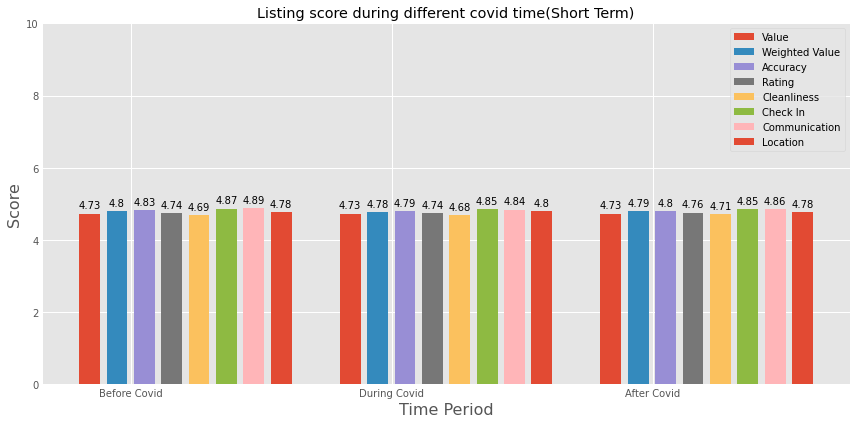

In [46]:
# labels
labels = ['Before Covid', 'During Covid','After Covid']

### Different Scores
value = [be_co_val, du_co_val,du_co_val]

weight_value = [be_co_wval, du_co_wval, af_co_wval]

accuracy = [be_co_acc,du_co_acc,af_co_acc]

rating = [be_co_rat,du_co_rat,af_co_rat]

cleanliness = [be_co_cle,du_co_cle,af_co_cle]

check_in = [be_co_chin,du_co_chin,af_co_chin]

communication = [be_co_com,du_co_com,af_co_com]

location = [be_co_loc,du_co_loc,af_co_loc]


# label location
x = np.arange(len(labels))  
# width of bar chart
width = 0.08 

fig, ax = plt.subplots()
rec1 = ax.bar(x - width*2, value, width, label='Value')
rec2 = ax.bar(x - width+0.025, weight_value, width, label='Weighted Value')
rec3 = ax.bar(x + 0.05, accuracy, width, label='Accuracy')
rec4 = ax.bar(x + width+ 0.075, rating, width, label='Rating')
rec5 = ax.bar(x + width*2 + 0.1, cleanliness, width, label='Cleanliness')
rec6 = ax.bar(x + width*3 + 0.125, check_in, width, label='Check In')
rec7 = ax.bar(x + width*4 + 0.15, communication, width, label='Communication')
rec8 = ax.bar(x + width*5 + 0.175, location, width, label='Location')


# text for the labels
ax.set_ylabel('Score', fontsize=16)
ax.set_xlabel('Time Period', fontsize=16)
ax.set_title('Listing score during different covid time(Short Term)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0,10])
ax.legend()


def autolabel(rects):
    """text labels"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset by 3 points
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rec1)
autolabel(rec2)
autolabel(rec3)
autolabel(rec4)
autolabel(rec5)
autolabel(rec6)
autolabel(rec7)
autolabel(rec8)

fig.set_size_inches(12, 6)
fig.tight_layout()

plt.show()


<b> Long Term</b>

In [47]:
### score weight setting
# before covid
x1 = long_before_covi.review_scores_accuracy.mean()*0.3097+long_before_covi.review_scores_cleanliness.mean()*0.231+long_before_covi.review_scores_communication.mean()*0.1825+long_before_covi.review_scores_location.mean()*0.1428+long_before_covi.review_scores_checkin.mean()*0.1339
# during covid
x2 = long_during_covi.review_scores_accuracy.mean()*0.3097+long_during_covi.review_scores_cleanliness.mean()*0.231+long_during_covi.review_scores_communication.mean()*0.1825+long_during_covi.review_scores_location.mean()*0.1428+long_during_covi.review_scores_checkin.mean()*0.1339
# after covid
x3 = long_after_covi.review_scores_accuracy.mean()*0.3097+long_after_covi.review_scores_cleanliness.mean()*0.231+long_after_covi.review_scores_communication.mean()*0.1825+long_during_covi.review_scores_location.mean()*0.1428+long_during_covi.review_scores_checkin.mean()*0.1339

### Convert the 
# before covid
be_co_val = float('%.2f' % long_before_covi['review_scores_value'].mean())
be_co_wval = float('%.2f' % x1)
be_co_acc = float('%.2f' % long_before_covi['review_scores_accuracy'].mean())
be_co_rat = float('%.2f' % long_before_covi['review_scores_rating'].mean())
be_co_cle = float('%.2f' % long_before_covi['review_scores_cleanliness'].mean())
be_co_chin = float('%.2f' % long_before_covi['review_scores_checkin'].mean())
be_co_com = float('%.2f' % long_before_covi['review_scores_communication'].mean())
be_co_loc = float('%.2f' % long_before_covi['review_scores_location'].mean())

# during covid
du_co_val = float('%.2f' % long_during_covi['review_scores_value'].mean())
du_co_wval = float('%.2f' % x2)
du_co_acc = float('%.2f' % long_during_covi['review_scores_accuracy'].mean())
du_co_rat = float('%.2f' % long_during_covi['review_scores_rating'].mean())
du_co_cle = float('%.2f' % long_during_covi['review_scores_cleanliness'].mean())
du_co_chin = float('%.2f' % long_during_covi['review_scores_checkin'].mean())
du_co_com = float('%.2f' % long_during_covi['review_scores_communication'].mean())
du_co_loc = float('%.2f' % long_during_covi['review_scores_location'].mean())

# after covid
af_co_val = float('%.2f' % long_after_covi['review_scores_value'].mean())
af_co_wval = float('%.2f' % x3)
af_co_acc = float('%.2f' % long_after_covi['review_scores_accuracy'].mean())
af_co_rat = float('%.2f' % long_after_covi['review_scores_rating'].mean())
af_co_cle = float('%.2f' % long_after_covi['review_scores_cleanliness'].mean())
af_co_chin = float('%.2f' % long_after_covi['review_scores_checkin'].mean())
af_co_com = float('%.2f' % long_after_covi['review_scores_communication'].mean())
af_co_loc = float('%.2f' % long_after_covi['review_scores_location'].mean())

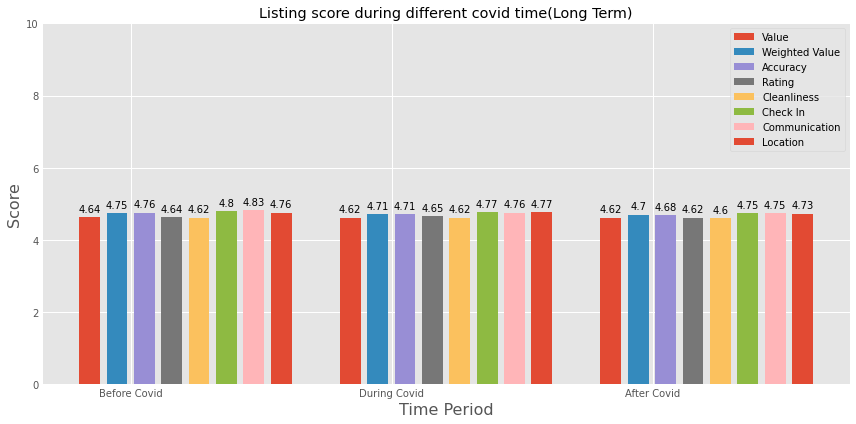

In [48]:
# labels
labels = ['Before Covid', 'During Covid','After Covid']

### Different Scores
value = [be_co_val, du_co_val,du_co_val]

weight_value = [be_co_wval, du_co_wval, af_co_wval]

accuracy = [be_co_acc,du_co_acc,af_co_acc]

rating = [be_co_rat,du_co_rat,af_co_rat]

cleanliness = [be_co_cle,du_co_cle,af_co_cle]

check_in = [be_co_chin,du_co_chin,af_co_chin]

communication = [be_co_com,du_co_com,af_co_com]

location = [be_co_loc,du_co_loc,af_co_loc]


# label location
x = np.arange(len(labels))  
# width of bar chart
width = 0.08 

fig, ax = plt.subplots()
rec1 = ax.bar(x - width*2, value, width, label='Value')
rec2 = ax.bar(x - width+0.025, weight_value, width, label='Weighted Value')
rec3 = ax.bar(x + 0.05, accuracy, width, label='Accuracy')
rec4 = ax.bar(x + width+ 0.075, rating, width, label='Rating')
rec5 = ax.bar(x + width*2 + 0.1, cleanliness, width, label='Cleanliness')
rec6 = ax.bar(x + width*3 + 0.125, check_in, width, label='Check In')
rec7 = ax.bar(x + width*4 + 0.15, communication, width, label='Communication')
rec8 = ax.bar(x + width*5 + 0.175, location, width, label='Location')


# text for the labels
ax.set_ylabel('Score', fontsize=16)
ax.set_xlabel('Time Period', fontsize=16)
ax.set_title('Listing score during different covid time(Long Term)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0,10])
ax.legend()


def autolabel(rects):
    """text labels"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset by 3 points
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rec1)
autolabel(rec2)
autolabel(rec3)
autolabel(rec4)
autolabel(rec5)
autolabel(rec6)
autolabel(rec7)
autolabel(rec8)

fig.set_size_inches(12, 6)
fig.tight_layout()

plt.show()


---

##### Draw the graph of the distribution of scores across the London area over three different periods

In [49]:
def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")
        
        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
        
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [50]:
# read the boroughs
ddir  = os.path.join('data','geo') # destination directory (in case it is not found this directory is created)
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )

# set the CRS
boros1 = boros.to_crs("epsg:4326")

# 
df_before_score_groupby = df_before_score.groupby('neighbourhood_cleansed').mean()
df_during_score_groupby = df_during_score.groupby('neighbourhood_cleansed').mean()
df_after_score_groupby = df_after_score.groupby('neighbourhood_cleansed').mean()

#
df_before_vis=pd.merge(boros,df_before_score_groupby,left_on='NAME',right_on='neighbourhood_cleansed')
df_during_vis=pd.merge(boros,df_during_score_groupby,left_on='NAME',right_on='neighbourhood_cleansed')
df_after_vis=pd.merge(boros,df_after_score_groupby,left_on='NAME',right_on='neighbourhood_cleansed')

Found data\geo\Boroughs.gpkg locally!


In [51]:
df_before_score_groupby.head(5)

review_scores_accuracy  review_scores_rating  \
neighbourhood_cleansed                                                 
Barking and Dagenham                     4.771                 4.605   
Barnet                                   4.705                 4.658   
Bexley                                   4.856                 4.535   
Brent                                    4.834                 4.717   
Bromley                                  4.700                 4.565   

                        review_scores_cleanliness  review_scores_checkin  \
neighbourhood_cleansed                                                     
Barking and Dagenham                        4.670                  4.841   
Barnet                                      4.607                  4.804   
Bexley                                      4.656                  4.940   
Brent                                       4.702                  4.874   
Bromley                                     4.634                  4.820   

                        review_scores_communication  review_scores_location  \
neighbourhood_cleansed                                                        
Barking and Dagenham                          4.776                   4.658   
Barnet                                        4.832                   4.685   
Bexley                                        4.911                   4.739   
Brent                                         4.897                   4.741   
Bromley                                       4.823                   4.663   

                        review_scores_value           id  latitude  longitude  
neighbourhood_cleansed                                                         
Barking and Dagenham                  4.692 31465462.843    51.541      0.113  
Barnet                                4.643 27148164.363    51.597     -0.201  
Bexley                                4.682 27616695.448    51.469      0.144  
Brent                                 4.746 25651965.660    51.547     -0.235  
Bromley                               4.651 27935326.323    51.399     -0.004

In [52]:
def get_geodatasource(gdf):    
    """Get getjsondatasource from geopandas object"""
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

def bokeh_plot_map(gdf, column=None, title=''):
    """Plot bokeh map from GeoJSONDataSource """
    
    tile_provider = get_provider(CARTODBPOSITRON)

    geosource = get_geodatasource(gdf)
    palette = brewer['OrRd'][8]
    palette = palette[::-1]
    vals = gdf[column]
    
    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette=palette, low=vals.min(), high=vals.max())
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=10,
                         location=(0,0), orientation='horizontal')

    tools = 'wheel_zoom,pan,reset,hover'
    
    p = figure(title = title, plot_height=700, plot_width=850, toolbar_location='right', tools=tools)
    p.add_tile(tile_provider)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    
    # Add patch renderer to figure
    p.patches('xs','ys', source=geosource, fill_alpha=0.5, line_width=0.5, line_color='white',  
              fill_color={'field' :column , 'transform': color_mapper})
    
    # Specify figure layout.
    p.add_layout(color_bar, 'below')
    
    # Add hover
    hover = p.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [("Name", "@NAME"),
                      ("Score", "@review_scores_value")]
    
    return p

Scores before covid

In [53]:
p = bokeh_plot_map(df_before_vis, 'review_scores_value', title='Score in London Before COVID')

handle = show(p, notebook_handle=True)
push_notebook(handle=handle)

D:\programs\anaconda3\lib\site-packages\bokeh\io\notebook.py:252: UserWarning: Cannot find a last shown plot to update. Call output_notebook() and show(..., notebook_handle=True) before push_notebook()
  warn("Cannot find a last shown plot to update. Call output_notebook() and show(..., notebook_handle=True) before push_notebook()")


Scores during covid

In [54]:
p = bokeh_plot_map(df_during_vis, 'review_scores_value', title='Score in London During COVID')

handle = show(p, notebook_handle=True)
push_notebook(handle=handle)

Scores after covid

In [55]:
p = bokeh_plot_map(df_after_vis, 'review_scores_value', title='Score in London After COVID')

handle = show(p, notebook_handle=True)
push_notebook(handle=handle)

--- 

#### Host service quality analysis (based on comment)

In this part, we run the sentiment analysis based on user's comments in Airbnb

---

#####  Data Loading

In [56]:
# import library
import nltk

# download the lexicon
nltk.download("vader_lexicon")

# import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create analyzer instance
sen_classifier = SentimentIntensityAnalyzer()

# check data
reviews.head(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\84398\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


listing_id                  id       date  reviewer_id  \
date_adj                                                                     
2022-05-10            52228441  623723762668719111 2022-05-10     37052865   
2021-11-28            52228441  505671819125096360 2021-11-28     70830110   
2021-10-05            52228441  466510411892882382 2021-10-05     83617224   
2022-04-13            52228441  604109461995958546 2022-04-13      2152541   
2022-05-23  605617198416835367  633128504578904919 2022-05-23     45418187   

           reviewer_name                                           comments  
date_adj                                                                     
2022-05-10      Kimberly  Great location, and the host was very responsi...  
2021-11-28       Mahelet  Duccio is a lovely and friendly host. From arr...  
2021-10-05          Will  Duccio is a good communicator… he was very hel...  
2022-04-13     Francesco  Not entirely compliant to the pics.<br/>Good l...  
2022-05-23        Waddah                         Great place and great host

---

##### Delete NAN values

In [57]:
# check the missing data
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     2
comments         92
dtype: int64

In [58]:
reviews = reviews.dropna()

##### Split data

In [59]:
### split dataset into three(before covid, during covid, after covid)

# split timestamp
split_date1 = '2019-01-01'
split_date2 = '2020-03-23'
split_date3 = '2021-07-14'
split_date4 = '2022-09-10'

# before covid
reviews_after_2019 = reviews.loc[reviews['date'] >= split_date1]
reviews_before_covi = reviews_after_2019.loc[reviews_after_2019['date'] <= split_date2]

# during covid
reviews_during_covi = reviews_after_2019.loc[reviews_after_2019['date'] <= split_date3]
reviews_during_covi = reviews_during_covi.loc[reviews_during_covi['date'] > split_date2]

# after covid
reviews_after_covi = reviews_after_2019.loc[reviews_after_2019['date'] > split_date3]

---

##### Sentiment Analysis

In [60]:
### random sample 10000 text from each covid period
# reason: 1. reduce calculation time 
#         2. decrease bias due to comments number
beco_sample = reviews_before_covi.sample(n=50000, random_state = 2)
duco_sample = reviews_during_covi.sample(n=50000, random_state = 2)
afco_sample = reviews_after_covi.sample(n=50000, random_state = 2)
#sen_after_covi.shape

In [61]:
# function for formatting the output
def output_format(output):
    # default 
    polarity = 'neutral'
    # positive
    if(output['compound'] >= 0.05):
        polarity = 'positive'
    # negative
    elif(output['compound'] <= -0.05):
        polarity = 'negative'
    
    return polarity

# function for generating output
def predict_sen(text):
    output_sen = sen_classifier.polarity_scores(text)
    return output_format(output_sen)

# apply the prediction
beco_sample['sen_prediction'] =  beco_sample['comments'].apply(predict_sen)
duco_sample['sen_prediction'] = duco_sample['comments'].apply(predict_sen)
afco_sample['sen_prediction'] = afco_sample['comments'].apply(predict_sen)

##### Analysis Result Visualization

In [62]:
# Regenerate dataframe
df_becovi1 = pd.DataFrame(data = beco_sample.groupby('sen_prediction').size().index, columns=['sen_prediction'])
df_becovi2 = pd.DataFrame(data = beco_sample.groupby('sen_prediction').size().values, columns=['num_polarity'])
df_becovi = pd.merge(df_becovi1, df_becovi2, left_index=True, right_index=True)


df_ducovi1 = pd.DataFrame(data = duco_sample.groupby('sen_prediction').size().index, columns=['sen_prediction'])
df_ducovi2 = pd.DataFrame(data = duco_sample.groupby('sen_prediction').size().values, columns=['num_polarity'])
df_ducovi = pd.merge(df_ducovi1, df_ducovi2, left_index=True, right_index=True)


df_afcovi1 = pd.DataFrame(data = afco_sample.groupby('sen_prediction').size().index, columns=['sen_prediction'])
df_afcovi2 = pd.DataFrame(data = afco_sample.groupby('sen_prediction').size().values, columns=['num_polarity'])
df_afcovi = pd.merge(df_afcovi1, df_afcovi2, left_index=True, right_index=True)

df_becovi

sen_prediction  num_polarity
0       negative          1775
1        neutral          4742
2       positive         43483

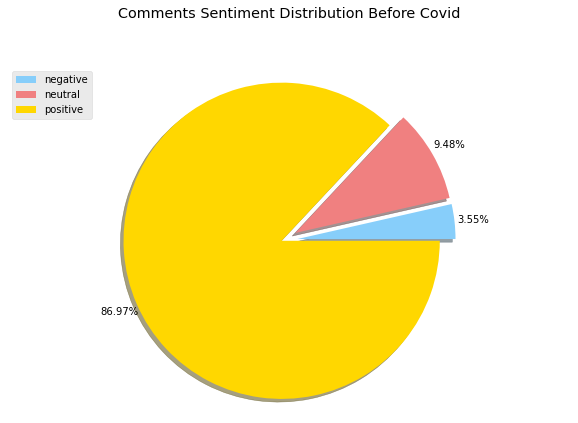

In [63]:
### Visualization
# before covid
colors_list = ['lightskyblue', 'lightcoral', 'gold']
explode_list = [0.1, 0.1, 0] # ratio for each continent with which to offset each wedge.

df_becovi['num_polarity'].plot(kind='pie',
                            figsize=(9, 6),
                            autopct='%1.2f%%', 
                            startangle=0,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            labeldistance = 5.0,
                            colors=colors_list,  # add custom colors
                            explode=explode_list, # 'explode' lowest 3 continents
  
                            )

# scale the title up by 12% to match pctdistance
plt.title('Comments Sentiment Distribution Before Covid', y=1.12) 

plt.axis('equal') 
plt.ylabel('')

# add legend
plt.legend(labels=df_becovi['sen_prediction'], loc='upper left') 

plt.show()

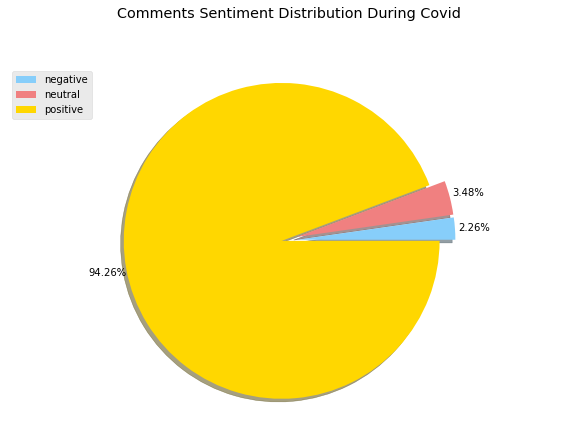

In [64]:
# during covid
colors_list = ['lightskyblue', 'lightcoral', 'gold']
explode_list = [0.1, 0.1, 0] # ratio for each continent with which to offset each wedge.

df_ducovi['num_polarity'].plot(kind='pie',
                            figsize=(9, 6),
                            autopct='%1.2f%%', 
                            startangle=0,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            labeldistance = 1.0,
                            colors=colors_list,  # add custom colors
                            explode=explode_list, # 'explode' lowest 3 continents
                            
                            )

# scale the title up by 12% to match pctdistance
plt.title('Comments Sentiment Distribution During Covid', y=1.12) 

plt.axis('equal') 
plt.ylabel('')

# add legend
plt.legend(labels=df_ducovi['sen_prediction'], loc='upper left') 

plt.show()

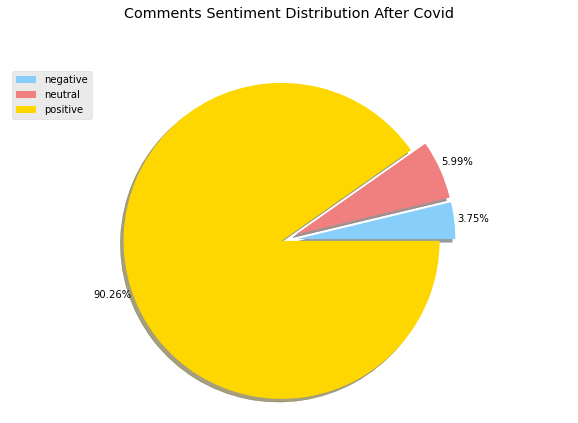

In [65]:
# after covid
colors_list = ['lightskyblue', 'lightcoral', 'gold']
explode_list = [0.1, 0.1, 0] # ratio for each continent with which to offset each wedge.

df_afcovi['num_polarity'].plot(kind='pie',
                            figsize=(9, 6),
                            autopct='%1.2f%%', 
                            startangle=0,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            labeldistance = 1.0,
                            colors=colors_list,  # add custom colors
                            explode=explode_list, # 'explode' lowest 3 continents
                            
                            )

# scale the title up by 12% to match pctdistance
plt.title('Comments Sentiment Distribution After Covid', y=1.12) 

plt.axis('equal') 
plt.ylabel('')

# add legend
plt.legend(labels=df_afcovi['sen_prediction'], loc='upper left') 

plt.show()

In [66]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.express as px
colors = ['lightskyblue', 'lightcoral', 'gold']

# Create subplots
fig = make_subplots(
   rows=1, cols=3,
   specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]]
)

# Set traces for the pie chart
fig.add_trace(go.Pie(
   values=df_becovi['num_polarity'],
   labels=df_becovi['sen_prediction'],
   domain=dict(x=[0, 0.5]),
   hoverinfo='label+percent',
   marker=dict(colors=colors, line=dict(color='#000000', width=2)),
   textinfo='label+percent',
   pull=[0, 0, 0.2],
   name="colors1"),
   row=1, col=1
)

# Traces for the second pie chart
fig.add_trace(go.Pie(
   values=df_ducovi['num_polarity'],
   labels=df_ducovi['sen_prediction'],
   domain=dict(x=[0.5, 1.0]),
   marker=dict(colors=colors, line=dict(color='#000000', width=2)),
   textinfo='label+percent', 
   pull=[0, 0, 0.2], 
   name="colors2"),
   row=1, col=2
)

# Traces for the third pie chart
fig.add_trace(go.Pie(
   values=df_afcovi['num_polarity'],
   labels=df_afcovi['sen_prediction'],
   domain=dict(x=[0.8, 1.0]),
   hoverinfo='label+percent', 
   marker=dict(colors=colors, line=dict(color='#000000', width=2)),
   pull=[0, 0, 0.2],
   textinfo='label+percent',  
   name="colors3"),
   row=1, col=3
)

fig.update_layout(
    title_text="Comments Sentiment Distribution During Different Covid Period", 
    annotations=[dict(text='Before Covid', x=0.025, y=-0.1, font_size=20, showarrow=False),
                 dict(text='During Covid', x=0.5, y=-0.1, font_size=20, showarrow=False),
                dict(text='After Covid', x=0.975, y=-0.1, font_size=20, showarrow=False)])
    # Add annotations in the center of the donut pies.

# Plot an image
fig.show()